# **Pattern Recognition (EC-416) Class Test-3**

## **Question 4**
### **Aim:** Write a program to compute the best fit distribution for the given 2 patterns like Bernoulli, Beta, Dirichlet, Distribution, Gaussian Distribution. Compute parameters of the distribution by using MAP


### **Members**

* Anirudh Nakra, Roll No:- DTU/2K17/EC/022
* Aditya Agrawal, Roll No: - DTU/2K17/EC/008
* Prateek Singh, Roll No: - DTU/2K17/EC/129

# Fitting to Bernoulli Distribution (Method 1)

A Bernoulli distribution is a discrete probability distribution for a Bernoulli trial — a random experiment that has only two outcomes (usually called a “Success” or a “Failure”). For example, the probability of getting a heads (a “success”) while flipping a coin is 0.5. The probability of “failure” is 1 – P (1 minus the probability of success, which also equals 0.5 for a coin toss). It is a special case of the binomial distribution for n = 1. In other words, it is a binomial distribution with a single trial (e.g. a single coin toss).

A Bernoulli trial is one of the simplest experiments you can conduct in probability and statistics. It’s an experiment where you can have one of two possible outcomes. For example, “Yes” and “No” or “Heads” and “Tails.”




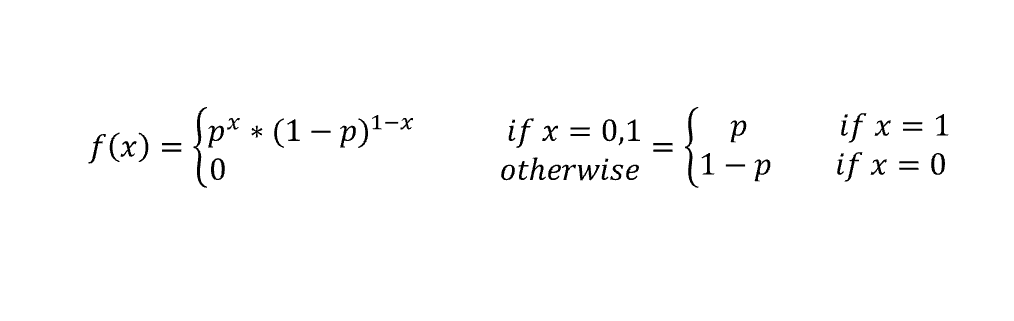

In [1]:
#Importing Libraries

import numpy as np
import scipy as sp
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Creating Random Bernoulli Distribution

In [2]:
theta = 0.7
n = 10
X_arr = np.random.choice([0, 1], p=[1-theta, theta], size=10)
X_arr

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0])

### Estimating True Mean

In [3]:
alpha = beta = 2
theta = 0.7
n=100  
X_arr = np.random.choice([0, 1], p=[1-theta, theta], size=n)
true_mean = sum(X_arr) /  X_arr.size
print(true_mean)

0.62


### Creating Beta Conjugate Prior 

In [4]:
beta_arr = np.asarray([[alpha+sum(X_arr[:i+1]), beta+(i+1-sum(X_arr[:i+1]))] for i in range(X_arr.size)])
beta_arr = np.insert(beta_arr, 0, [alpha, beta], 0)

In [5]:
J=[]
for h in range(0,n+1):
    J.append(h)

### Maximizing Posterior Estimation (MAP)

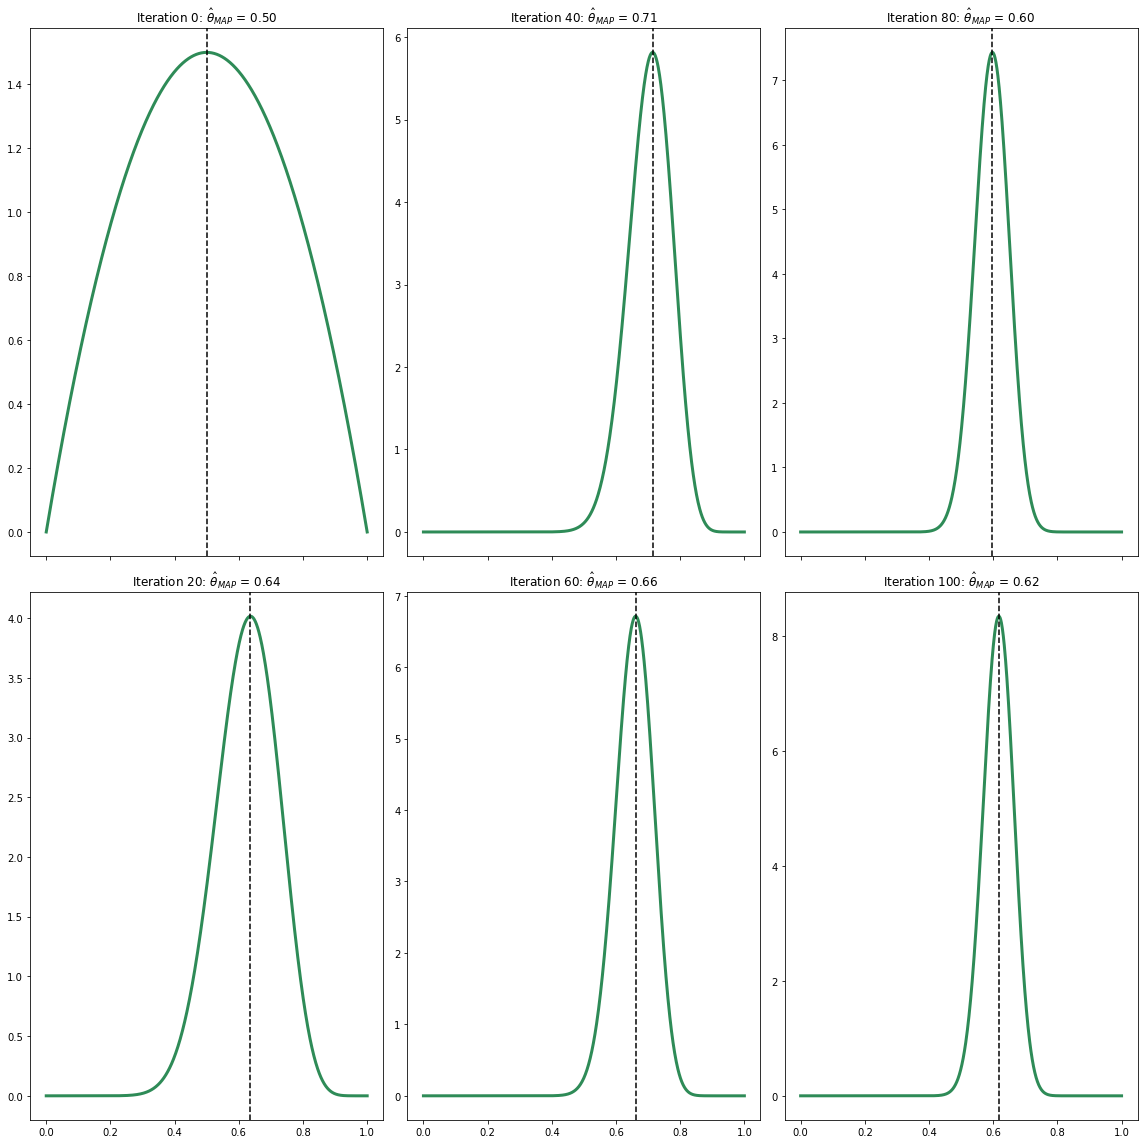

In [6]:
beta_X = np.linspace(0, 1, 1000)
my_color = '#2E8B57'
n_col=3
n_row=2
fig, ax_arr = plt.subplots(ncols=n_col, nrows=n_row , figsize=(16,16), sharex=True)
out = []
ax_idx_x=0
ax_idx_y=0
for i, iter_ in enumerate(J): 
    
    a, b = beta_arr[iter_]
    beta_Y = sp.stats.beta.pdf(x=beta_X, a=a, b=b)

    if a > 1 and b > 1:
        mode = (a-1)/(a+b-2)
    else:
        mode = a/(a+b)
    out.append(mode)
    if (i==0) or (i%20==0):
        ax = ax_arr[ax_idx_x][ax_idx_y]
        ax.plot(beta_X, beta_Y, color=my_color, linewidth=3)
        ax.axvline(x=mode, linestyle='--', color='k')
        ax.set_title('Iteration %d: $\hat{\\theta}_{MAP}$ = %.2f'%(iter_, mode))
        if ax_idx_x==n_row-1:
            ax_idx_x=0
            ax_idx_y+=1
            continue
        ax_idx_x+=1
    if (i==100):
        final_mode = mode
fig.tight_layout()

### Predicting Distribution parameters

(array([ 1.,  1.,  0.,  3.,  0.,  6., 12., 32., 34., 12.]),
 array([0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75]),
 <BarContainer object of 10 artists>)

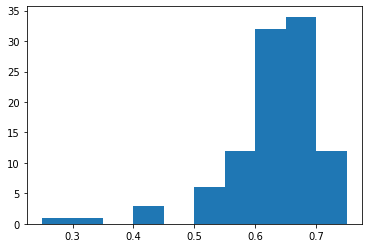

In [7]:
plt.hist(out)

In [8]:
print("Mean of MAP Estimate=",np.mean(out))
print("Variance of MAP Estimate=",np.var(out))

Mean of MAP Estimate= 0.6282517225424575
Variance of MAP Estimate= 0.006219496065863909


In [9]:
error = 0
for e in out:
    error = error + (e-true_mean)**2
error = (error/100) ** (0.5)
print("Root Mean Square Error of MAP Estimate= ",error)

Root Mean Square Error of MAP Estimate=  0.07968979144588989


# Fitting to Bernoulli Distribution (Method 2)

In [10]:
#Importing Libraries

from __future__ import division
from scipy.stats import bernoulli 
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy.abc import x, z
from scipy.stats import beta
import matplotlib.pyplot as plt
import math

### Creating a true mean ditribution

In [11]:
p_true=1/2 # this is the value we will try to estimate from the observed data
fp=bernoulli(p_true)

def sample(n=10):
    'simulate coin flipping'
    return fp.rvs(n)# flip it n times

xs = sample(100) # generate some samples

In [12]:
p=sympy.symbols('p',positive=True)

L=p**x*(1-p)**(1-x)
J=np.prod([L.subs(x,i) for i in xs]) # objective function to maximize

### Defining Objective Function 

<string>:2: RuntimeWarning: divide by zero encountered in log


Text(0.5, 1.0, 'Estimate not equal to true value')

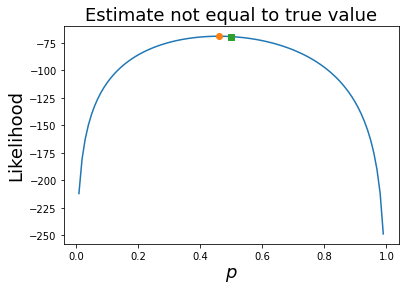

In [13]:
logJ=sympy.expand_log(sympy.log(J))
sol=sympy.solve(sympy.diff(logJ,p),p)[0]

x=np.linspace(0,1,100)
plt.plot(x,list(map(sympy.lambdify(p,logJ,'numpy'),x)),sol,logJ.subs(p,sol),'o',
                                          p_true,logJ.subs(p,p_true),'s',)
plt.xlabel('$p$',fontsize=18)
plt.ylabel('Likelihood',fontsize=18)
plt.title('Estimate not equal to true value',fontsize=18)

In Bayesian probability theory, if the posterior distributions p(θ | x) are in the same probability distribution family as the prior probability distribution p(θ), the prior and posterior are then called conjugate distributions, and the prior is called a conjugate prior for the likelihood function p(x | θ). For example, the Gaussian family is conjugate to itself (or self-conjugate) with respect to a Gaussian likelihood function: if the likelihood function is Gaussian, choosing a Gaussian prior over the mean will ensure that the posterior distribution is also Gaussian. This means that the Gaussian distribution is a conjugate prior for the likelihood that is also Gaussian.

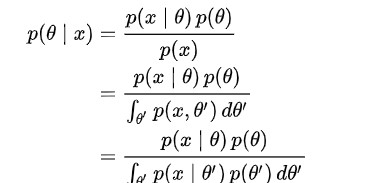

In probability theory and statistics, the beta distribution is a family of continuous probability distributions defined on the interval [0, 1] parameterized by two positive shape parameters, denoted by α and β, that appear as exponents of the random variable and control the shape of the distribution. The generalization to multiple variables is called a Dirichlet distribution.

The beta distribution has been applied to model the behavior of random variables limited to intervals of finite length in a wide variety of disciplines.

In Bayesian inference, the beta distribution is the conjugate prior probability distribution for the Bernoulli, binomial, negative binomial and geometric distributions. The beta distribution is a suitable model for the random behavior of percentages and proportions.

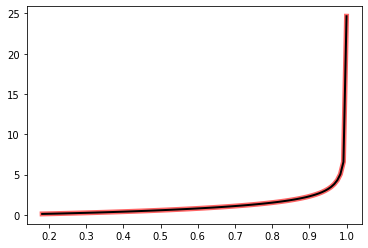

In [14]:
fig, ax = plt.subplots(1, 1)
a, b = 2.31, 0.627
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')
rv = beta(a, b)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
values=[]
for i in x:
  values.append(sympy.log(rv.pdf(i)))
values = np.array(values)

### Solving MAP equation

In Bayesian statistics, a maximum a posteriori probability (MAP) estimate is an estimate of an unknown quantity, that equals the mode of the posterior distribution. The MAP can be used to obtain a point estimate of an unobserved quantity on the basis of empirical data.

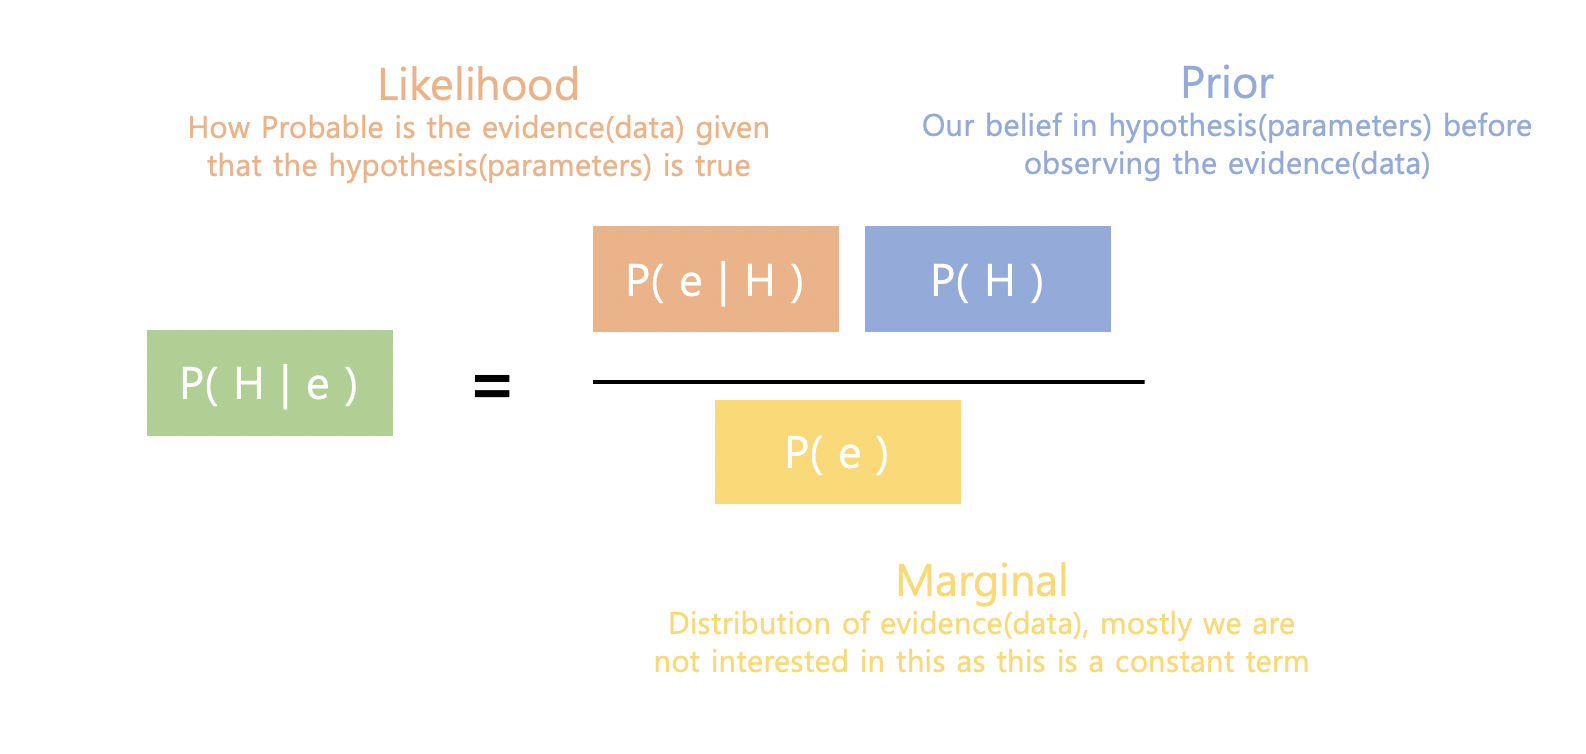

In [15]:
def estimator_gen(niter=100,ns=100):
    'generate data to estimate distribution of maximum a posteriori'
    out=[]
    x=sympy.symbols('x',real=True)
    L=   (p**x)*((1-p)**(1-x))
    for i in range(niter):
        xs = sample(ns) # generate some samples from the experiment
        J=np.prod([L.subs(x,i) for i in xs]) # objective function to maximize
        J=J*values[i]
        logJ=sympy.expand_log(sympy.log(J)) 
        sol=sympy.solve(sympy.diff(logJ,p),p)[0]
        out.append(float(sol.evalf()))
    return out if len(out)>1 else out[0] # return scalar if list contains only 1 term

In [16]:
min_mean = 10
min_diff = 10
min_index = 0
best_etries= 0 
for i in range(50):
    etries = estimator_gen(100) 
    if abs(0.5-np.mean(etries))<min_diff:
        min_diff = abs(0.5-np.mean(etries))
        min_mean=np.mean(etries)
        min_index = i
        best_etries = etries

### Visualizing Results

Text(0.5, 1.0, '$\\mu=0.50000000,\\sigma=0.00184400$')

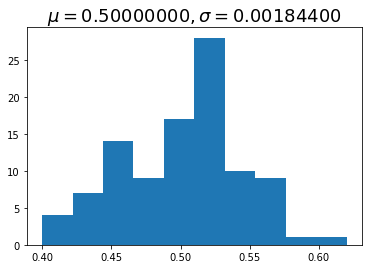

In [17]:
plt.hist(best_etries) # histogram of maximum a posteriori
plt.title('$\mu=%3.8f,\sigma=%3.8f$'%(np.mean(best_etries),np.var(best_etries)),fontsize=18)

In [18]:
error = (min_mean-0.5)/0.5 * 100
print("Mean after MAP estimate= ",abs(error)," %")

Mean after MAP estimate=  0.0  %


# Fitting to Normal Distribution

In [19]:
# Importing Libraries

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm

from scipy.special import expit as logistic

RANDOM_SEED = 58
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [20]:
az.style.use("arviz-darkgrid")
def standardize(series):
    """Standardize a pandas series"""
    return (series - series.mean()) / series.std()

In [21]:
N = 100
true_a, true_b  = 0.5, 3.0 
predictor = np.random.normal(loc=2, scale=6, size=N)
true_mu = true_a + true_b * predictor
true_sd = 2.0

outcome = np.random.normal(loc=true_mu, scale=true_sd, size=N)

f"{predictor.mean():.2f}, {predictor.std():.2f}, {outcome.mean():.2f}, {outcome.std():.2f}"

'2.46, 6.01, 8.18, 18.37'

In [22]:
predictor_scaled = standardize(predictor)
outcome_scaled = standardize(outcome)

f"{predictor_scaled.mean():.2f}, {predictor_scaled.std():.2f}, {outcome_scaled.mean():.2f}, {outcome_scaled.std():.2f}"

'0.00, 1.00, 0.00, 1.00'

### Calculating Prior Distribution

In [23]:
with pm.Model() as model_1:
    a = pm.Normal("a", 0.0, 10.0)
    b = pm.Normal("b", 0.0, 10.0)

    mu = a + b * predictor_scaled
    sd = pm.Exponential("sd", 1.0)

    obs = pm.Normal("obs", mu=mu, sigma=sd, observed=outcome_scaled)
    prior_checks = pm.sample_prior_predictive(samples=50, random_seed=RANDOM_SEED)

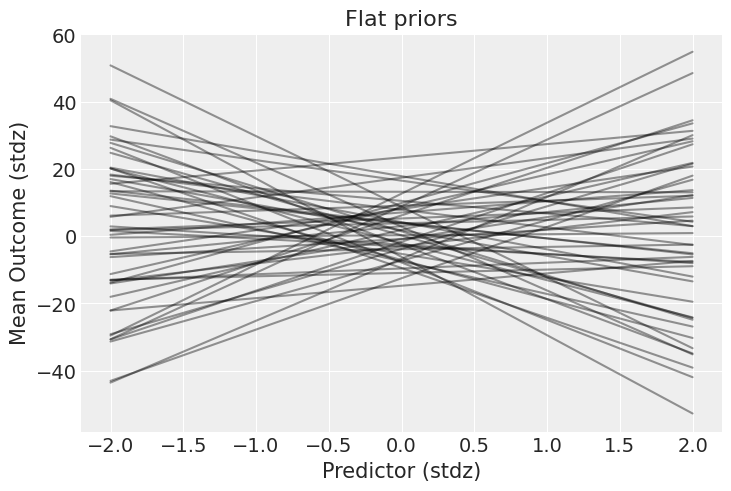

In [24]:
_, ax = plt.subplots()

x = np.linspace(-2, 2, 50)

for a, b in zip(prior_checks["a"], prior_checks["b"]):
    y = a + b * x
    ax.plot(x, y, c="k", alpha=0.4)

ax.set_xlabel("Predictor (stdz)")
ax.set_ylabel("Mean Outcome (stdz)")
ax.set_title("Flat priors");

In [25]:
with pm.Model() as model_1:
    a = pm.Normal("a", 0.0, 0.5)
    b = pm.Normal("b", 0.0, 1.0)

    mu = a + b * predictor_scaled
    sd = pm.Exponential("sd", 1.0)

    obs = pm.Normal("obs", mu=mu, sigma=sd, observed=outcome_scaled)
    prior_checks = pm.sample_prior_predictive(samples=50, random_seed=RANDOM_SEED)

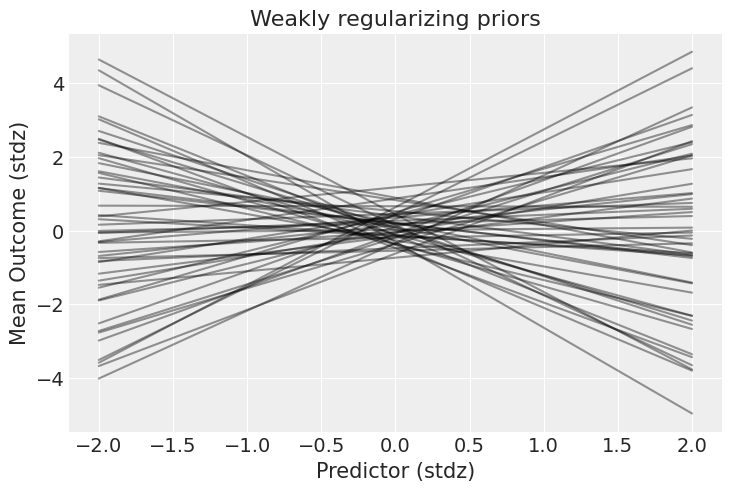

In [26]:
_, ax = plt.subplots()

x = np.linspace(-2, 2, 50)

for a, b in zip(prior_checks["a"], prior_checks["b"]):
    y = a + b * x
    ax.plot(x, y, c="k", alpha=0.4)

ax.set_xlabel("Predictor (stdz)")
ax.set_ylabel("Mean Outcome (stdz)")
ax.set_title("Weakly regularizing priors");

### Training & Maximizing Posterior (MAP)

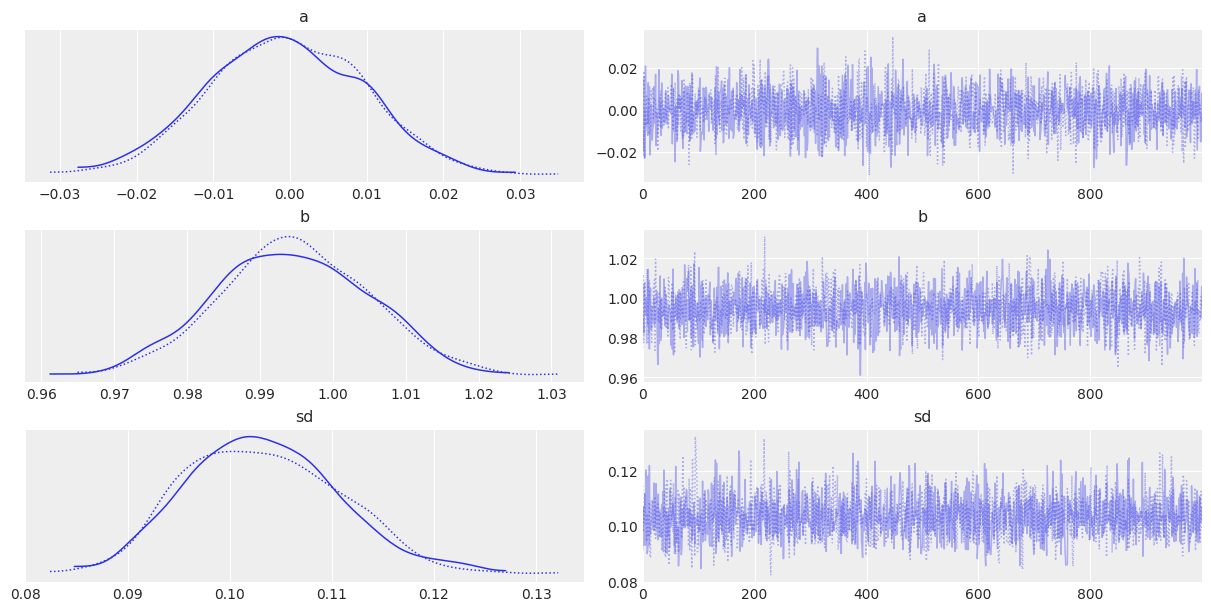

In [27]:
with model_1:
    trace_1 = pm.sample(1000, tune=2000, random_seed=RANDOM_SEED, return_inferencedata=True)
az.plot_trace(trace_1);

In [28]:
with model_1:
    ppc = pm.sample_posterior_predictive(
        trace_1, var_names=["a", "b", "obs"], random_seed=RANDOM_SEED
    )

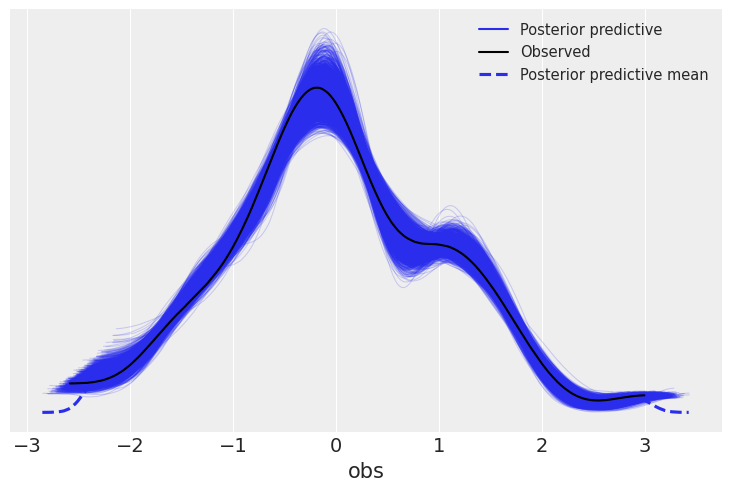

In [29]:
ax = az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=model_1));

### Best Fit

In [30]:
line1 = ax.lines

In [31]:
min_error = 1000
min_index = 0
for i in range(1,2002):
    error = (np.mean(line1[2002].get_xdata())-np.mean(line1[i].get_xdata()))/np.mean(line1[i].get_xdata())*100
    if abs(error)<min_error:
        min_error=abs(error)
        min_index=i

In [32]:
y_mean = [] 
for i in range(len(line1[min_index].get_xdata())):
    mean = 0
    for j in range(1,2002):
            mean = mean + line1[j].get_ydata()[i]
    mean = mean/2001.0
    y_mean.append(mean)

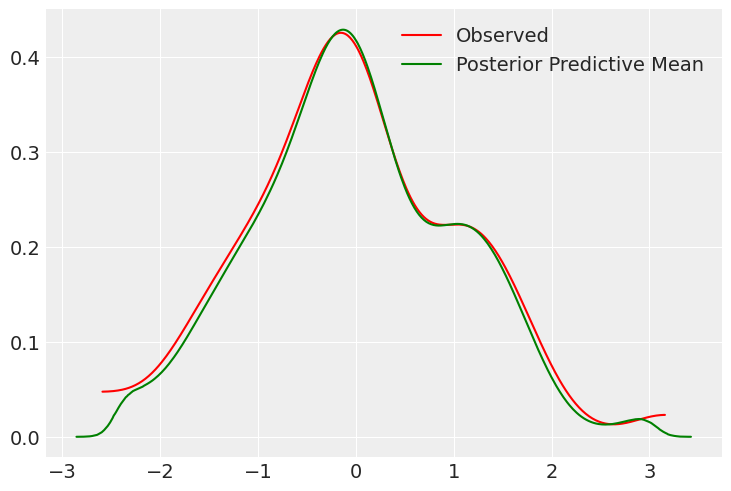

In [33]:
plt.plot(line1[min_index].get_xdata(), y_mean, label="Observed" ,color ='r') #1500
plt.plot(line1[2002].get_xdata(), line1[2002].get_ydata(), label="Posterior Predictive Mean", color='g')
plt.legend()

### Estimating Parameter of Best Fit Distribution

In [34]:
print("Mean of Observed Data=",np.mean(line1[min_index].get_xdata()))
print("Variance of Observed Data=",np.var(line1[min_index].get_xdata()))
print("\n")
print("Mean after MAP estimate=",np.mean(line1[2002].get_xdata()))
print("Variance after MAP estimate=",np.var(line1[2002].get_xdata()))

Mean of Observed Data= 0.2845718704350214
Variance of Observed Data= 2.763289044740936


Mean after MAP estimate= 0.28455802249888373
Variance after MAP estimate= 3.297664607595316


In [35]:
error = (np.mean(line1[2002].get_xdata())-np.mean(line1[min_index].get_xdata()))/np.mean(line1[min_index].get_xdata())
print("Percentage Error of MAP Estimate= ",abs(error*100)," %")

Percentage Error of MAP Estimate=  0.004866235062695932  %
